In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from geopy import distance
from operator import itemgetter

In [2]:
df = pd.read_csv('data/kaiterra_fieldeggid_15min_2018_Sep_28_panel.csv', index_col=[0,1], parse_dates=True)

In [3]:
grouped = df.groupby(level=0)
latlondict = {}

for name,group in grouped:
    latlondict[name] = (group.latitude[0], group.longitude[0])

latlondict

{'113E': (28.545184999999996, 77.24589),
 '1FD7': (28.56502, 77.19097),
 '20CA': (28.574575, 77.16107),
 '2E9C': (28.523289000000002, 77.19338),
 '498F': (28.55663, 77.23477),
 '4BE7': (28.532871000000004, 77.21710999999999),
 '5D7A': (28.482569, 77.1004),
 '72CA': (28.455966999999998, 77.31596),
 '8E2A': (28.474102000000002, 77.122215),
 '91B8': (28.50305, 77.18566),
 'A9BE': (28.556858000000002, 77.22059),
 'BB4A': (28.55498, 77.19443000000001),
 'BC46': (28.63295, 77.2887),
 'BFDC': (28.521082, 77.21423),
 'C0A7': (28.41508, 77.04353),
 'CBC7': (28.601406, 77.18571),
 'D804': (28.55823, 77.20862),
 'DF07': (28.561666, 77.23694),
 'E1F8': (28.571775, 77.23176),
 'E47A': (28.54249, 77.20719),
 'E486': (28.536617, 77.372284),
 'E8E4': (28.565070000000002, 77.19753)}

In [4]:
tsindex = df.index.levels[1]

In [5]:
# sample values for testing
fieldeggid = '20CA'
numnodes = 5

In [6]:
# compute and store distances
dists_list = [(idnum, distance.distance(latlondict[fieldeggid], latlondict[idnum]).meters) 
         for idnum in latlondict.keys() if idnum != fieldeggid]
dists_list.sort(key=itemgetter(1))
dists_list

[('1FD7', 3111.1743661560777),
 ('E8E4', 3719.522804666681),
 ('CBC7', 3827.8472679965616),
 ('BB4A', 3920.5193096164576),
 ('D804', 4992.649882242915),
 ('E47A', 5745.46925689572),
 ('A9BE', 6145.754679062155),
 ('2E9C', 6504.177513998924),
 ('E1F8', 6923.020233105645),
 ('4BE7', 7171.782466120288),
 ('498F', 7480.299075245761),
 ('DF07', 7559.821804758247),
 ('BFDC', 7887.384125325235),
 ('91B8', 8284.246861378218),
 ('113E', 8915.825888850786),
 ('8E2A', 11766.78900963323),
 ('5D7A', 11799.928766049501),
 ('BC46', 14060.162646884564),
 ('72CA', 20066.997386617884),
 ('E486', 21091.66115436858),
 ('C0A7', 21092.530955843744)]

In [7]:
# create new empty dataframe
data = pd.DataFrame(data=None, 
                    index=tsindex, 
                    columns=['Monitor_{:02d}'.format(i) for i in range(1,numnodes+1)], 
                    dtype=pd.np.double)

# iterate through index and update data constantly
for ts in tqdm(tsindex):
    
    # for each timestamp, choose "numnode" nearest neighbors that have valid values (not NaNs)
    vals = df.loc[(slice(None),ts),:].pm25
    
    count = 0
    vals_knn = np.ones(numnodes) * np.nan
    for tup in dists_list:
        val = vals.loc[(tup[0],ts)]
        if not pd.np.isnan(val):
            vals_knn[count] = (val / tup[1]) * (1e7 / tup[1])
            count += 1
        if count == numnodes:
            break
    data.loc[ts,:] = vals_knn

data

100%|██████████| 20026/20026 [01:34<00:00, 213.01it/s]


,Monitor_01,Monitor_02,Monitor_03,Monitor_04,Monitor_05
timestamp_round,,,,,
2018-03-01 00:00:00,185.342447,NaN,NaN,NaN,NaN
2018-03-01 00:15:00,194.461681,NaN,NaN,NaN,NaN
2018-03-01 00:30:00,212.979694,NaN,NaN,NaN,NaN
2018-03-01 00:45:00,230.223719,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,235.547066,NaN,NaN,NaN,NaN
2018-03-01 01:15:00,247.831731,NaN,NaN,NaN,NaN
2018-03-01 01:30:00,270.353616,NaN,NaN,NaN,NaN
2018-03-01 01:45:00,275.403978,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,290.964560,NaN,NaN,NaN,NaN


In [8]:
data.min(), data.max()

(Monitor_01    2.274938
 Monitor_02    0.000000
 Monitor_03    0.088253
 Monitor_04    0.115889
 Monitor_05    0.044954
 dtype: float64, Monitor_01    343.606621
 Monitor_02    412.846437
 Monitor_03    188.137359
 Monitor_04    273.014838
 Monitor_05    115.354635
 dtype: float64)

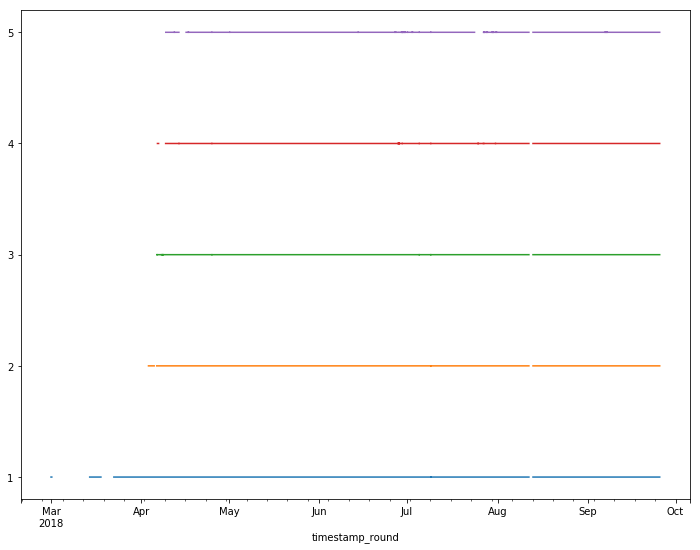

In [9]:
# plot availabilities
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
for i in range(1, numnodes+1):
    colseries = data['Monitor_{:02d}'.format(i)]
    colseries.where(pd.np.isnan(colseries.values), other=i).plot(ax=ax)

ax.set_yticks(pd.np.arange(1,numnodes+1))
plt.show()

# data.Monitor_01

In [ ]:
# The goal now is to run script for several combinations of
# field egg id and numnodes (K).
# iterate through the field egg IDs
fieldeggids_list = df.index.levels[0]

for fieldeggid in fieldeggids_list:

    # compute and store the sorted distances of every monitor from "fieldeggid"
    dists_list = [(idnum, distance.distance(latlondict[fieldeggid], latlondict[idnum]).meters) 
                  for idnum in latlondict.keys() if idnum != fieldeggid]
    dists_list.sort(key=itemgetter(1))
    
    for numnodes in range(1,11):

        print('Field egg ID: {}, K: {}'.format(fieldeggid, numnodes))
        
        # create new empty dataframe
        data = pd.DataFrame(data=None, 
                            index=tsindex, 
                            columns=['Monitor_{:02d}'.format(i) for i in range(1,numnodes+1)], 
                            dtype=np.double)

        # iterate through index and update data 
        for ts in tqdm(tsindex):
            
            # for each timestamp, choose "numnode" nearest neighbors
            # that have valid values (not NaNs)
            vals = df.loc[(slice(None),ts),:].pm25
            
            count = 0
            vals_knn = np.ones(numnodes) * np.nan
            for tup in dists_list:
                val = vals.loc[(tup[0],ts)]
                if not np.isnan(val):
                    vals_knn[count] = (val / tup[1]) * (1e7 / tup[1])
                    count += 1
                if count == numnodes:
                    break
            data.loc[ts,:] = vals_knn
        
        # save the data
        data.to_csv('datasets/knn_pm25_{}_K{:02d}.csv'.format(fieldeggid, numnodes))